In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import camb
from camb import model, initialpower

In [2]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.2 installed at /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/camb


In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 67.5, ombh2 = .022, omch2 = .122)
results = camb.get_background(pars)

In [4]:
# calculate distances for redshifts 0 to 12
z = np.linspace(0,12)
add = results.angular_diameter_distance(z)
ld = results.luminosity_distance(z)
cd = results.comoving_radial_distance(z, tol = .001)

Text(0.5, 1.0, 'Angular diameter distance functions of redshift')

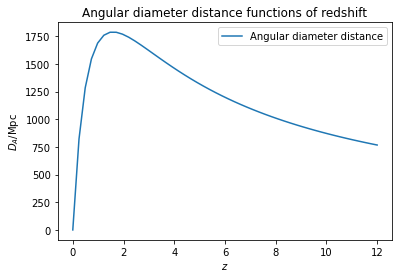

In [5]:
plt.plot(z, add, label = 'Angular diameter distance')
plt.xlabel('$z$')
plt.ylabel(r'$D_A /\rm{Mpc}$')
plt.legend()
plt.title('Angular diameter distance functions of redshift')

Text(0.5, 1.0, 'Luminosity distance as function of redshift')

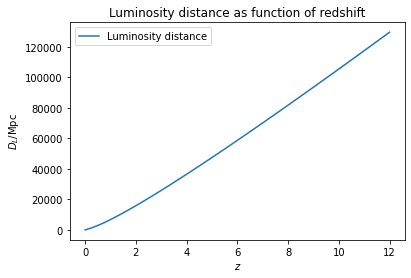

In [6]:
plt.plot(z, ld, label = 'Luminosity distance')
plt.xlabel('$z$')
plt.ylabel(r'$D_L /\rm{Mpc}$')
plt.legend()
plt.title('Luminosity distance as function of redshift')

Text(0.5, 1.0, 'Comoving distance as function of redshift')

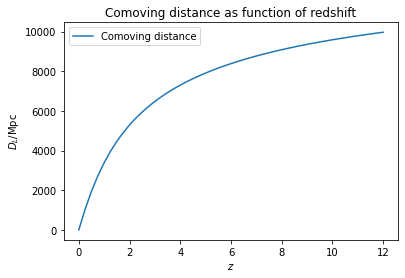

In [7]:
plt.plot(z, cd, label = 'Comoving distance')
plt.xlabel('$z$')
plt.ylabel(r'$D_L /\rm{Mpc}$')
#xlim = plt.gca().get_xlim()
#plt.hlines(10000, xlim[0], xlim[1], linestyle = 'dashed')
plt.legend()
plt.title('Comoving distance as function of redshift')

In [50]:
# calculate distances for redshifts 0 to 4
z2 = np.linspace(0, 4)
add2 = results.angular_diameter_distance(z2)
ld2 = results.luminosity_distance(z2)
cd2 = results.comoving_radial_distance(z2, tol = .001)

Text(0.5, 1.0, 'Cosmological distances as functions of redshift')

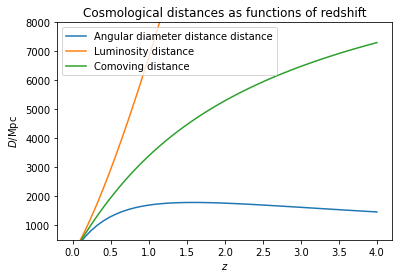

In [51]:
# plot all together to compare

plt.plot(z2, add2, label = 'Angular diameter distance distance')
plt.plot(z2, ld2, label = 'Luminosity distance')
plt.ylim([500,8000])
plt.plot(z2, cd2, label = 'Comoving distance')
plt.xlabel('$z$')
plt.ylabel(r'$D /\rm{Mpc}$')
plt.legend()
plt.title('Cosmological distances as functions of redshift')

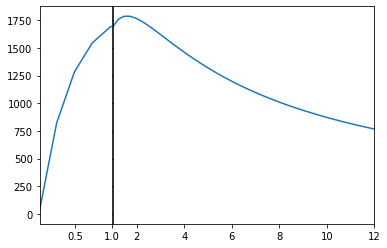

In [47]:
# combination log, linear axes scaling

rightAxis = plt.gca()
rightAxis.plot(z, add)
rightAxis.set_xlim((1, 12))

divider = make_axes_locatable(rightAxis)

leftAxis = divider.append_axes("left", size = 1, pad = 0.02, sharey = rightAxis) # change sharey for top/bottom plots
leftAxis.plot(z, add)
leftAxis.set_xlim((0.01, 1));